## Importando a Biblioteca

(https://scikit-learn.org/stable/modules/classes.html)

In [1]:
import sklearn

## Base de Dados

In [2]:
from sklearn import datasets
iris = datasets.load_iris
iris

<function sklearn.datasets._base.load_iris>

In [3]:
import pandas as pd
import numpy as np

In [4]:
diabetes  = pd.read_csv('/content/diabetes.csv')
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [5]:
batimentos = pd.read_csv('/content/batimentos cardiacos.csv',sep=',')
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [6]:
type(batimentos)


pandas.core.frame.DataFrame

In [7]:
# Tratamentos do campo Idade que possui decimais
cols = ['Idade']
batimentos[cols] = batimentos[cols].applymap(np.int64)
batimentos.to_csv('/content/drive/MyDrive/Colab Notebooks/Cursos Alura/Python para DataScience/Estufod_MAchine_learning/base de dados/batimentos cardiacos.csv')
batimentos

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44,53.591343,3.397836,82.307425
1,81,172.569375,33.142344,179.045377
2,50,74.582817,8.645704,103.522796
3,55,90.491878,12.622969,114.239779
4,53,84.129280,11.032320,107.184063
...,...,...,...,...
995,86,188.432199,37.108050,189.035111
996,63,115.620461,18.905115,130.773648
997,71,139.842839,24.960710,150.330074
998,62,111.959082,17.989771,129.754953


In [8]:
colesterol = pd.read_csv('/content/colesterol.csv')
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


## Treinando os Dados

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# X são os dados fornecidos ao modelo, são os dados de entrada as informações recebidas
# Y é o target, o resultado
x = diabetes.drop('resultado', axis=1)
y = diabetes['resultado']

Separação dos dados

In [11]:
# o default dessa função é 25% das entradas para treino e 75% das entradas para teste
SEED = 4121988
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

## Temas abordadso até aqui

* Utilizar a biblioteca Scikit-learn;
* Acessar o Google Colab;
* Importar a biblioteca;
* Ler uma base de dados;
* Treinar os dados.

Treino

In [12]:
from sklearn.tree import DecisionTreeClassifier

Árvore de Decisão 
Classificação

In [13]:
clf_arvore = DecisionTreeClassifier(random_state= SEED, max_depth= 3)

In [14]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4121988, splitter='best')

In [15]:
clf_arvore.score(x_teste, y_teste)

0.703125

Plotando a árvore

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

<function matplotlib.pyplot.show>

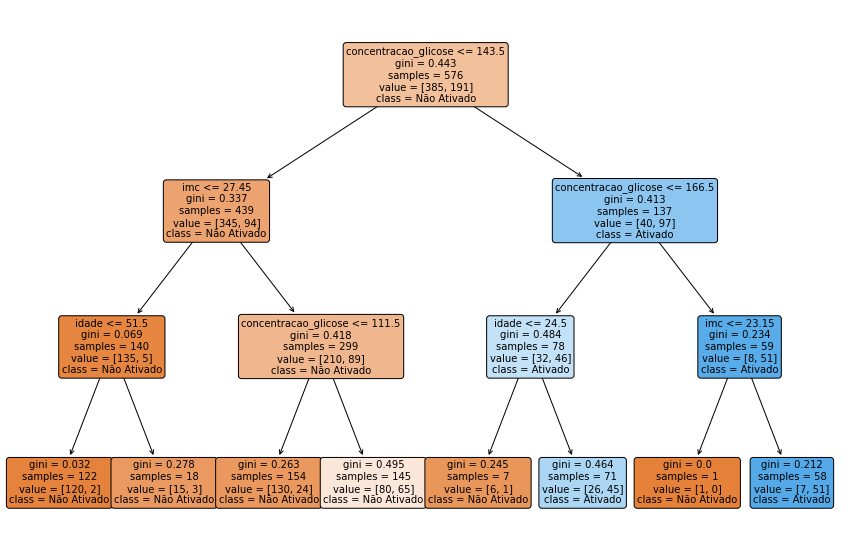

In [17]:
fig, ax = plt.subplots(figsize = (15,10))
tree.plot_tree(clf_arvore,
               ax = ax,
               fontsize = 10,
               rounded = True,
               filled = True,
               feature_names = x_treino.columns,
               class_names = ['Não Ativado', 'Ativado'], rotate = True)
plt.show



Uma grande vantagem da árvore de decisão é que ela possui fácil entendimento e requer menos limpeza dos dados.

Em um modelo de árvore de decosão é interessante que pode acontecer overfitting (bom ajuste para os dados de treino e não tão bom para os dados de teste). Para evitar o overfitting, pode-se utilizar o método de póda, logo é possível ajustar os dados através dos galhos e folhas da árvore de decisão 

In [18]:
# testar um modelo que não possui uma acurácia muito boa
# caso a acurácia do que se espera que seja ruim, for melhor do que o escolhido
# até o momento, quer dizer que o modelo escolhido deve ser alterado

from sklearn.dummy import DummyClassifier

In [19]:
clf_dummy =  DummyClassifier(strategy='most_frequent')

In [20]:
clf_dummy.fit(x_treino, y_treino)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [21]:
clf_dummy.score(x_teste, y_teste)
# Como a precisão do modelo escolhido é maior que o Dummy quer dizer que modelos semelhantes devem funcionar bem

0.5989583333333334

## Foram abordados os seguintes temas até aqui:

* Como identificar problemas de classificação;
* Construir uma árvore de decisão;
* Como prever um problema de classificação;
* acurácia;
* O dummy classifier.

Regressão Linear

A diferença para a classificação é que na regressão um valor é estimado, diferentemente de sim ou não (0 ou 1) da classificação

In [22]:
import seaborn as sns 

<Figure size 7200x3600 with 0 Axes>

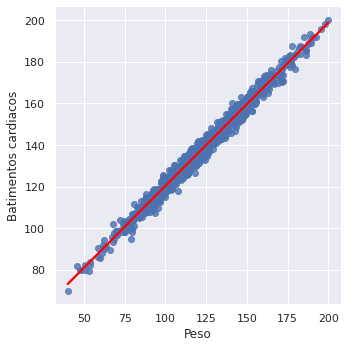

In [23]:
sns.set()
plt.figure(figsize=(100,50))

sns.lmplot(x = 'Peso', y = 'Batimentos cardiacos', data = batimentos,line_kws={'color': 'red'})
plt.show()

In [24]:
batimentos

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44,53.591343,3.397836,82.307425
1,81,172.569375,33.142344,179.045377
2,50,74.582817,8.645704,103.522796
3,55,90.491878,12.622969,114.239779
4,53,84.129280,11.032320,107.184063
...,...,...,...,...
995,86,188.432199,37.108050,189.035111
996,63,115.620461,18.905115,130.773648
997,71,139.842839,24.960710,150.330074
998,62,111.959082,17.989771,129.754953


In [25]:
x = batimentos[['Peso', 'Idade']]

In [26]:
y = batimentos['Batimentos cardiacos']

In [27]:
SEED = 4500
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,random_state = SEED)

In [28]:
from sklearn import linear_model

rgs = linear_model.LinearRegression(fit_intercept = False, normalize = True)

In [29]:
rgs.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [30]:
rgs.score(x_teste,y_teste)

0.9866834874572998

Clustering

Aprendizado não supervionado

Agrupamento

In [31]:
colesterol

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131
301,57,0,2,130,0,2,174,0,0.0,2,1,3,1,236


Construindo um Modelo

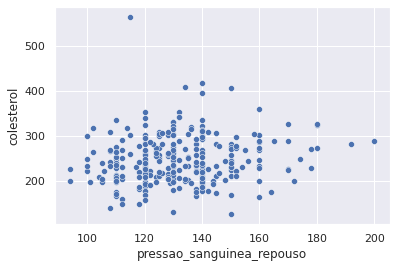

In [32]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 9)

In [37]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [38]:
X = colesterol.select_dtypes('int64')

In [39]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [40]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

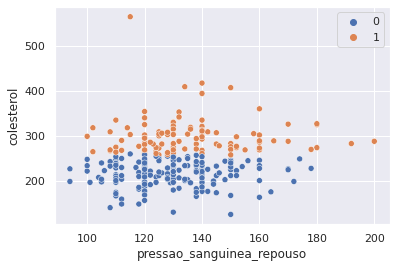

In [41]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol, hue= kmeans.labels_) 

In [42]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,0
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,1
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,0
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,0
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,0


In [43]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    216.473958
1    298.963964
Name: colesterol, dtype: float64